In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from copy import deepcopy
import seaborn as sns
sns.set_style("darkgrid")

from LWR_posterior import BC_prior_mean_OU_highres, BC_len, generate_LWR_ICs, LWR_Solver


# AIES LWR: a long run

- Ran 3 chains of 34K and concatenated them together

In [2]:
N = 100000
Lwalkers = 13
outputs_dir = "S3_outputs"
dir_name = "Long-run"

FDsamples = {walker_num:np.genfromtxt(f"{outputs_dir}/{dir_name}/AIES_LWR-FD-N_{N}-L_{Lwalkers}-a_prop_2-M_trunc_4-walker{walker_num}.txt") for walker_num in range(Lwalkers)}
logpostlist = np.genfromtxt(f"{outputs_dir}/{dir_name}/AIES_LWR-FD-N_{N}-L_{Lwalkers}-a_prop_2-M_trunc_4-LogPostList.txt") 


outletsamples = {walker_num: np.genfromtxt(f"{outputs_dir}/{dir_name}/AIES_LWR-outlet-N_{N}-L_{Lwalkers}-a_prop_2-M_trunc_4-walker{walker_num}.txt") for walker_num in range(0, Lwalkers)}

inletsamples = {walker_num: np.genfromtxt(f"{outputs_dir}/{dir_name}/AIES_LWR-inlet-N_{N}-L_{Lwalkers}-a_prop_2-M_trunc_4-walker{walker_num}.txt") for walker_num in range(Lwalkers)}

In [3]:
matplotlib.rcParams.update({'font.size': 15})

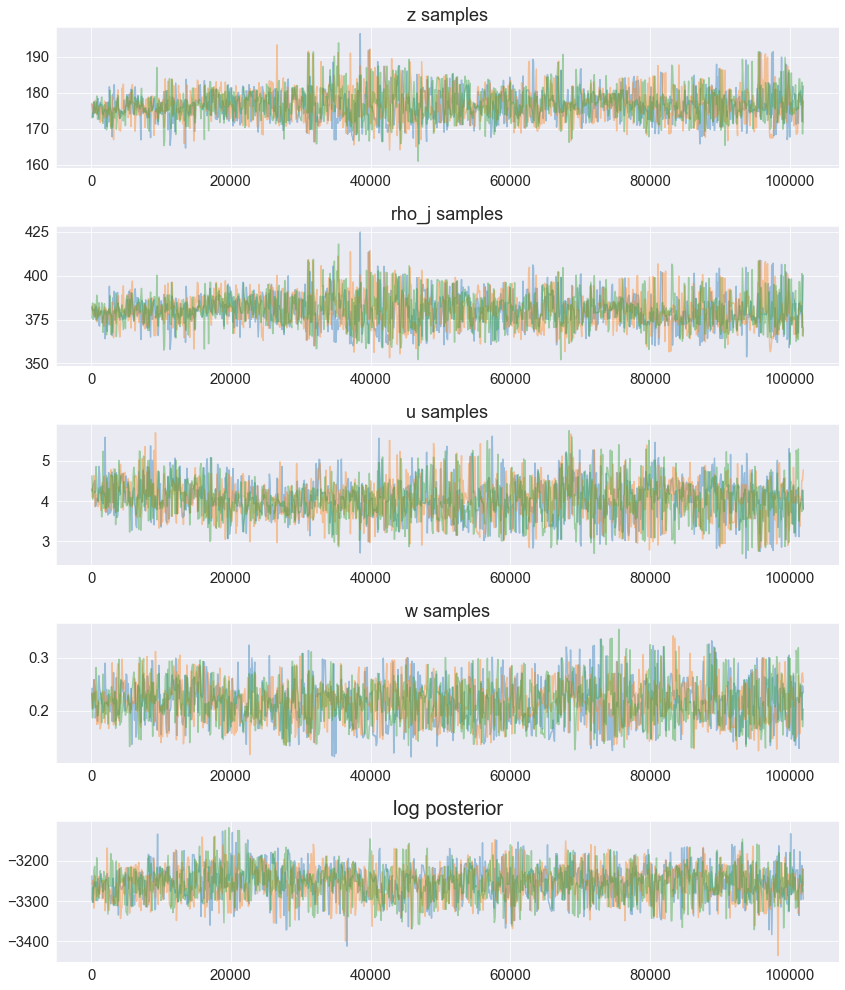

In [4]:
burnin = 1
# upto = 150
upto = 1020

walker_list = [0,1,2]
walker_list = [3,4,5]
walker_list = [6,7,8]
# walker_list = [9,10,11]
# walker_list = range(Lwalkers)

step_save = 100

fig, ax = plt.subplots(5, figsize=(12,14))
x_range = np.arange(0, N*3, step_save)[burnin:upto]

for idx, parm in enumerate(['z','rho_j','u','w']):
    for k,v in FDsamples.items():
        if k not in walker_list: continue
        ax[idx].plot(x_range, v[burnin:upto,idx], alpha=0.4)
        ax[idx].set_title(f"{parm} samples", size=18)
ax[4].plot(x_range, logpostlist[burnin:upto, walker_list], alpha=0.4)
ax[4].set_title(f"log posterior", size=20)
    
plt.tight_layout()

# plt.savefig("plots/LWR_FDtrace.png")

# BC trace plots

## Outlet BC

In [5]:
def BC_trace_plots(samples, walker_list, burnin, time_step):
    time_range = range(0,1921, time_step)

    x_range = np.arange(0, 102000, step_save)[burnin:]

    fig, ax = plt.subplots(len(time_range), figsize=(12, 3*len(time_range)))

    for idx, time_pt in enumerate(time_range):
        for k,v in samples.items():
            if k not in walker_list: continue
            ax[idx].plot(x_range, v[burnin:, time_pt], label=f"walker {k}")
            ax[idx].set_title(f"Time pt {time_pt} ({time_pt/60:.1f} min)", size=18)
            ax[idx].legend()
            ax[idx].set_xlabel("Iteration", size=17)

    plt.tight_layout()

Plotting 3 walkers with 101 BCs each


Text(0.5, 1.0, 'Outlet BC')

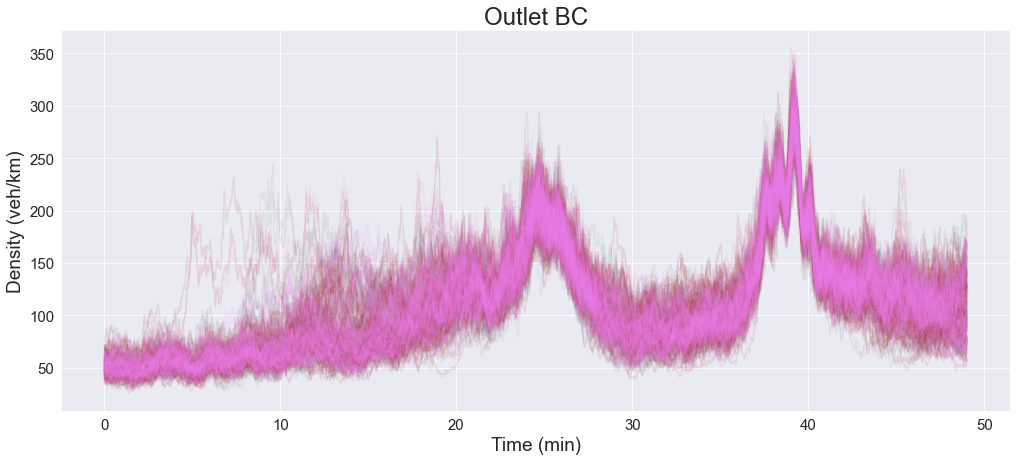

In [6]:
burnin = 10
upto = 1020

# walker_num = 0
walker_list = [0,1,2,]
walker_list = [3,4,5]
walker_list = [6,7,8]
# walker_list = [9,10,11]
# walker_list = [10, 11, 12]
# walker_list = range(1,11)

plt.figure(figsize=(17,7))
color_list = ['blue', 'green', 'red', 'orange', 'cyan', 'magenta', 'grey', 'brown', 'violet', 'steelblue','chocolate', 'greenyellow', 'teal']
BC_type = "BC_outlet"

iter_range = range(burnin, upto, 10)
time_range = np.linspace(0,49, BC_len)
print(f"Plotting {len(walker_list)} walkers with {len(iter_range)} BCs each")

for walker_num in walker_list:
    for iternum in iter_range:
        BC_sample = outletsamples[walker_num][iternum,:] + BC_prior_mean_OU_highres[BC_type]
        BC_sample = np.exp(outletsamples[walker_num][iternum,:] + BC_prior_mean_OU_highres[BC_type])
        plt.plot(time_range, BC_sample, alpha=0.1, c=color_list[walker_num])
plt.xlabel("Time (min)", size=19)
plt.ylabel("Density (veh/km)", size=19)
plt.title("Outlet BC", size=24)
# plt.savefig("plots/LWR_Outletsamples.png")




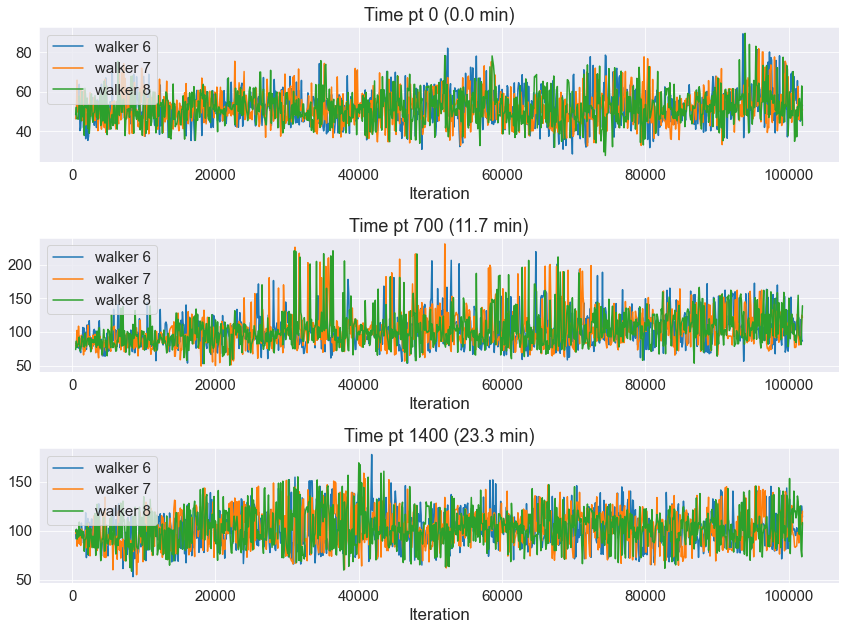

In [7]:
burnin = 5
time_pt = 0
walker_list = [0,1,2]
walker_list = [3,4,5]
walker_list = [6,7,8]
# walker_list = [9,10,11]
# walker_list = [10, 11, 12]
# walker_list = range(0,Lwalkers)

time_step = 700

exp_outlet = {k:np.exp(v+BC_prior_mean_OU_highres['BC_outlet']) for k,v in outletsamples.items()}
BC_trace_plots(exp_outlet, walker_list, burnin, time_step)

# BC_trace_plots(outletsamples, walker_list, burnin, time_step)

# plt.savefig("plots/LWR_outlet_trace.png")

## Inlet BC

Plotting 3 walkers with 101 BCs each


Text(0, 0.5, 'Density (veh/km)')

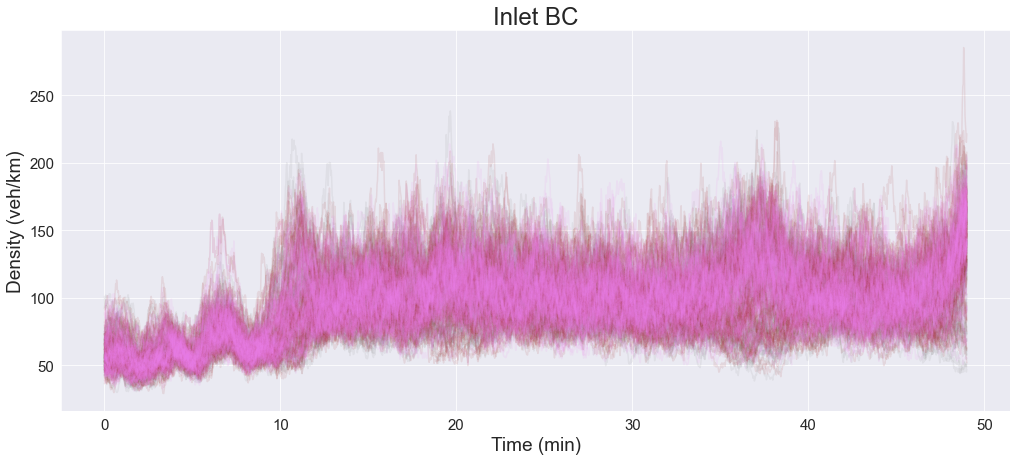

In [8]:
burnin = 10

walker_num = 0
walker_list = [0,1,2,]
walker_list = [3,4,5]
walker_list = [6,7,8]
# walker_list = [9,10,11]
# walker_list = [10, 11, 12]
# walker_list = range(13)

plt.figure(figsize=(17,7))
color_list = ['blue', 'green', 'red', 'orange', 'cyan', 'magenta', 'grey', 'brown', 'violet', 'steelblue','chocolate', 'greenyellow', 'teal']
BC_type = "BC_inlet"

iter_range = range(burnin, upto, 10)
time_range = np.linspace(0,49, BC_len)
print(f"Plotting {len(walker_list)} walkers with {len(iter_range)} BCs each")

for walker_num in walker_list:
    for iternum in iter_range:
#         BC_sample = inletsamples[walker_num][iternum,:] + BC_prior_mean_OU_highres[BC_type]
        BC_sample = np.exp(inletsamples[walker_num][iternum,:] + BC_prior_mean_OU_highres[BC_type])
        plt.plot(time_range, BC_sample, alpha=0.1, c=color_list[walker_num])
        
plt.title("Inlet BC", size=24)
plt.xlabel("Time (min)", size=19)
plt.ylabel("Density (veh/km)", size=19)

# plt.savefig("plots/LWR_Inletsamples.png")


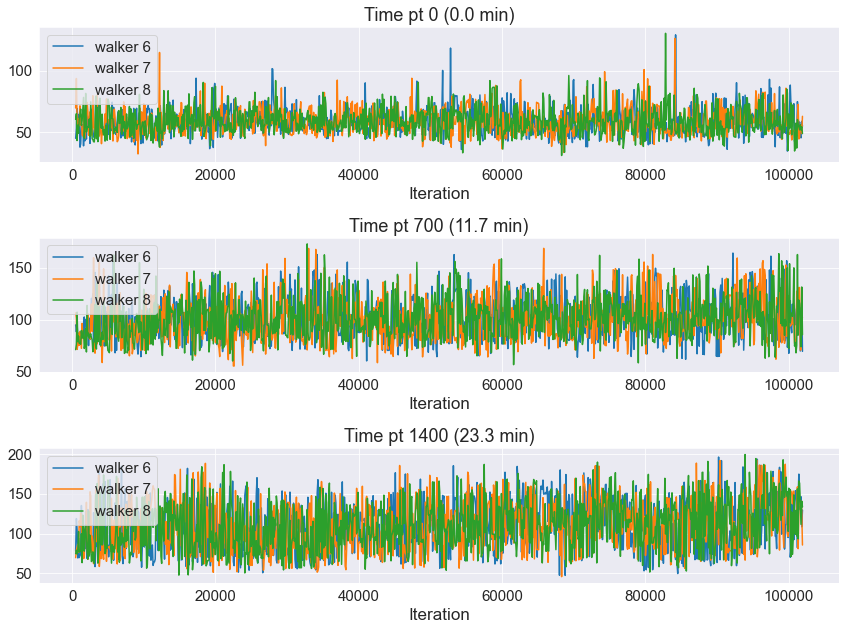

In [9]:
burnin = 5
time_pt = 0
walker_list = [0,1,2]
walker_list = [3,4,5]
walker_list = [6,7,8]
# walker_list = [9,10,11]
# walker_list = [10, 11, 12]
# walker_list = range(Lwalkers)

time_step = 700
exp_inlet = {k:np.exp(v+BC_prior_mean_OU_highres['BC_inlet']) for k,v in inletsamples.items()}
BC_trace_plots(exp_inlet, walker_list, burnin, time_step)

# BC_trace_plots(inletsamples, walker_list, burnin, time_step)

# plt.savefig("plots/LWR_inlet_trace.png")

## FD BC density estimate

(12240, 1921)
(12240, 1921)


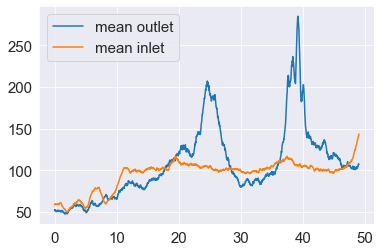

In [10]:
import warnings
warnings.filterwarnings("ignore")

# get mean outlet from all chains
outlet_list = []
for chain_num in range(0, 12):
    outlet_list.append(np.exp(outletsamples[chain_num]  + BC_prior_mean_OU_highres['BC_outlet']))

myoutlets = np.concatenate(outlet_list)    
print(myoutlets.shape)
mean_outlet = np.mean(myoutlets, axis=0)
plt.plot(time_range, mean_outlet, label="mean outlet")


# get mean inlet from all chains
inlet_list = []
for chain_num in range(0, 12):
    inlet_list.append(np.exp(inletsamples[chain_num]  + BC_prior_mean_OU_highres['BC_inlet']))

myinlets = np.concatenate(inlet_list)    
print(myinlets.shape)
mean_inlet = np.mean(myinlets, axis=0)
plt.plot(time_range, mean_inlet, label="mean inlet")

plt.legend()

config_dict = {'my_analysis_dir': '2018/June3_2018-DS1_del_Cast-rawBCs',
                'run_num': 1,
                'data_array_dict':
                        {'flow': 'data_array_70108_flow_49t.csv',
                        'density': 'data_array_70108_density_49t.csv'},
                'ratio_times_BCs': 40,
                      }

LWR = LWR_Solver(config_dict=config_dict)

density_data = np.genfromtxt(LWR.config.DATA_DENSITY_PATH)
flow_data = np.genfromtxt(LWR.config.DATA_FLOW_PATH)


flow_data_inlet = flow_data[flow_data[:,0]==0]
flow_data_outlet = flow_data[flow_data[:,0]==5]


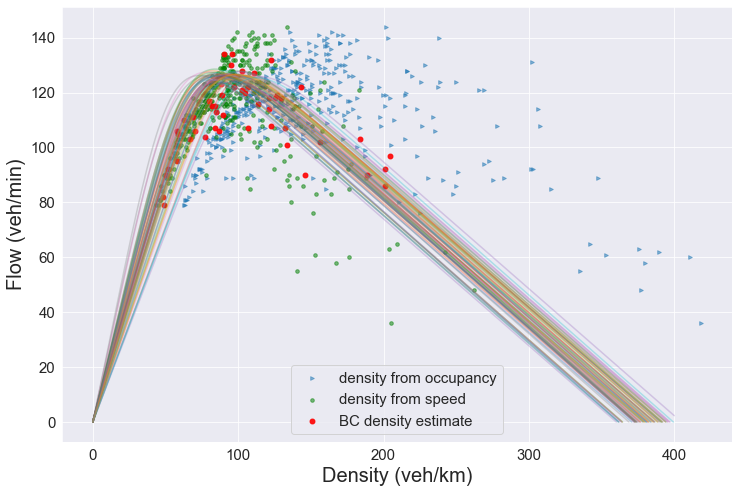

In [11]:
data_array_densities = np.genfromtxt("data/density_occspeed_flow_49t.csv")
x_range = np.arange(0, 400, 0.1)

plt.figure(figsize=(12, 8))

# plt.scatter(density_data[:,2], flow_data[:,2], alpha=0.6, label="Density from occupancy")

plt.scatter(data_array_densities[:,0], data_array_densities[:,2], alpha=0.5, 
            label="density from occupancy", s=13, marker=">")
plt.scatter(data_array_densities[:,1], data_array_densities[:,2], alpha=0.5, 
            label="density from speed", c='g', s=13, marker="o")

plt.scatter(mean_outlet[::40], flow_data_outlet[:,2], alpha=0.9, c='r', 
            label="BC density estimate", s=24)

my_fd_samples = np.concatenate([elem[100::20] for _, elem in FDsamples.items()])


for params in my_fd_samples[::10]:
    z, rho_j, u, w = params
    fd_neg_fn = LWR._call_FD_neg_power(1/w, u, rho_j, z)
    plt.plot(x_range, fd_neg_fn(x_range), alpha=0.3)
    
plt.xlabel("Density (veh/km)", size=20)
plt.ylabel("Flow (veh/min)", size=20)
plt.legend(loc="bottom")

# plt.savefig("plots/FES_FD_3_density_estimates.pdf")

# x-t plot with means params

In [12]:
from matplotlib import cm

def plot_LWR_xt(FD, data_variable, title_save=None, config_dict=None, out_times=None, figsize=(12,9)):
    """
    Run LWR using the given parameters and plot in the x-t plane
    Parameters
    ----------
    FD: dict
        Dictionary of FD parameter values. Must include the FD parameters along with the key 'solver',
        whos values can either be 'lwr_exp' or 'lwr_del_Cast'
    data_variable: str
        Variable to use to plot output: either 'flow' or 'density'
    title_save: None (default) or str
        If not None: save figure with given name
    config_dict: dict
        Configuration dictionary to pass to LWR_Solver. It should have 'data_array_dict' with the data CSVs
        Default is None, which uses the default config_dict
    figsize: tuple
        Default is (10, 10)
    """
    if config_dict is None:
        LWR = LWR_Solver()
    else:
        LWR = LWR_Solver(config_dict=config_dict)
    if out_times is None:
        pass
    else:
        LWR.out_times = out_times

    if 'z' in FD:
        FD["z"] = FD.pop('z')
    for elem in ['BC_Gibbs']:
        if elem in FD:
            FD.pop(elem)
    claw = LWR.lwr(**FD)
    x_min_solver = 0

    rho_claw = np.array([elem.q[0,:] for elem in claw.frames])

    # select time range
    t_min = 0
    t_max = LWR.final_time

    t_grid = np.linspace(t_min, t_max, len(LWR.out_times))
    x_grid = np.linspace(LWR.x_min_solver,LWR.x_max_solver,LWR.PDE_num_cells)
    # x_grid = x
    xx_LWR, tt_LWR = np.meshgrid(x_grid, t_grid)

    if data_variable=='flow':
        params = {k:v for k,v in FD.items() if k not in ['solver', 'BC_inlet', 'BC_outlet']}
        if FD.get('solver')=='lwr_exp':
            my_FD = lambda x: FD_exp(rho=x, **params)
        elif FD.get('solver')=='lwr_del_Cast':
            params["z"] = params.pop('z')
            my_FD = lambda x: FD_neg_power(rho=x, **params)
        rho_claw = list(map(my_FD, rho_claw))

    fig_lwr_xt = plt.figure(figsize=figsize)
    ax = fig_lwr_xt.add_subplot(1,1,1)
    CS = ax.contourf(tt_LWR, xx_LWR,rho_claw, cmap=cm.coolwarm)

    cbar = fig_lwr_xt.colorbar(CS, shrink=0.8, extend='both')
    cbar.set_label('Density (veh/km)', size=25)
    # ax.set_title("{0} from LWR with {1} FD".format(data_variable, FD.get('solver')[4:]), size = 15)
    ax.set_ylabel('Distance on the road (km)', size=30)
    ax.set_xlabel('Time (min)', size=30)
    plt.tight_layout()
    if title_save is not None:
        plt.savefig(title_save)
    # plt.show()

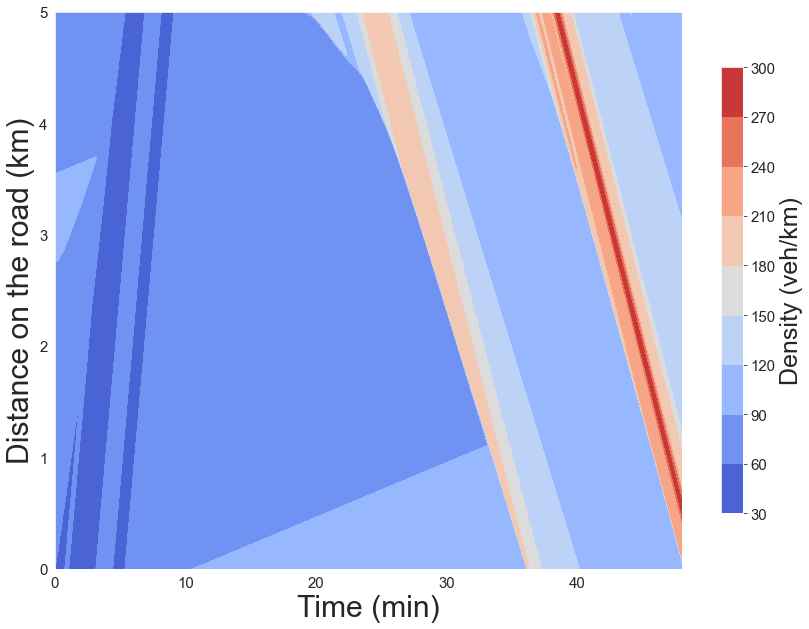

In [13]:
config_dict = {'my_analysis_dir': '2018/June3_2018-DS1_del_Cast-rawBCs',
                'run_num': 1,
                'data_array_dict':
                        {'flow': 'data_array_70108_flow_49t.csv',
                        'density': 'data_array_70108_density_49t.csv'},
                'ratio_times_BCs': 40,
                      }

my_fd_samples = np.concatenate([elem[100::20] for _, elem in FDsamples.items()])

LWR = LWR_Solver(config_dict=config_dict)

z, rho_j, u, w = my_fd_samples.mean(axis=0)
FD = {'z':z, 'rho_j': rho_j, 'u':u, 'w':w}

FD['solver'] = 'lwr_del_Cast'
FD['w'] = 1/FD['w']

FD['BC_outlet'] = mean_outlet
FD['BC_inlet'] = mean_inlet


title_save = None
# title_save = "plots/FES_xt_mean.png"


plot_LWR_xt(FD=FD, data_variable='density', config_dict=config_dict,
           out_times=np.linspace(0,40*LWR.final_time, 1200), title_save=title_save)

## Residuals

Text(0, 0.5, 'Predicted flow - observed flow')

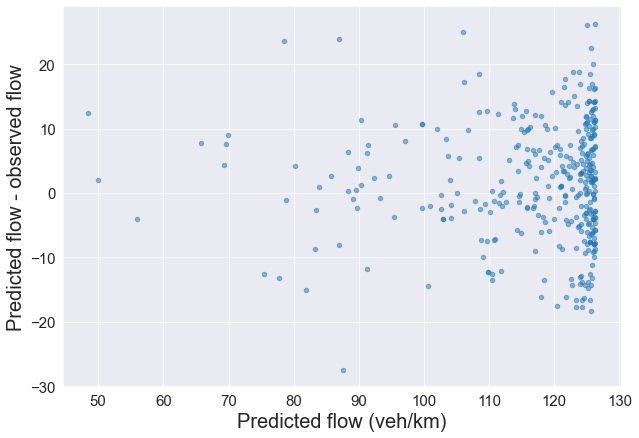

In [14]:
df_resid = LWR.get_residuals(**FD)

plt.figure(figsize=(10,7))
plt.scatter(df_resid['PDE_data'], df_resid['residuals'], alpha=0.5, s=20)
plt.xlabel("Predicted flow (veh/km)", size=20)
plt.ylabel("Predicted flow - observed flow", size=20)

# plt.savefig("plots/residuals_FES.png")